In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
train_data  = pd.read_csv("./Alphabets/train.csv",header=None).to_numpy()

In [3]:
train_x = train_data[:,:-1].astype('float128')
train_y = train_data[:,-1]

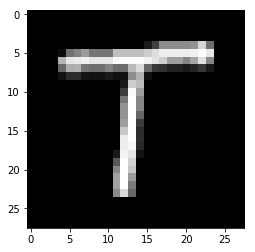

In [4]:
"""data consists of 26 english alphabets"""
plt.imshow(train_x[28,:].astype('int').reshape((28,28)),cmap='gray')

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def oneHotEncoding(y): #y is list of ouput label 0<=y<26
    """ converts y label to vector representation called One Hot Encoding """
    a = np.array(y)
    b = np.zeros((a.size, 26))
    b[np.arange(a.size),a] = 1
    return b

In [7]:
class neuralNetwork:
    """Assuming fully connected network"""
    
    def __inti__(self, mini_batch_size, total_input_features, architecture, total_target_class):
        self.mini_batch_size  = mini_batch_size
        self.total_input_features = total_input_features
        self.architecture = architecture # this is list of nodes in hidden layer
        self.total_target_class = total_target_class
        

In [8]:
def initalize_parameters(total_input_features , architecture, total_target_class):
    parameter = dict()
    total_layers_architecture = architecture  + [total_target_class]
    
    for layer, total_neurons in enumerate(total_layers_architecture):
        layerNumber = layer+1
        layerInputSize = total_input_features + 1
        layerOutputSize = total_neurons
        """random floats sampled from a univariate *normal* (Gaussian)
            distribution of mean 0 and variance 1"""
        layer_parameter = np.random.randn(layerOutputSize, layerInputSize)*0.1
#         print(layerNumber)
        parameter[layerNumber] = layer_parameter
        total_input_features = layerOutputSize
    
    return parameter

In [9]:
def layer_feedforward(current_input,parameters):
    total_examples = current_input.shape[0]
    X = np.append(np.ones((total_examples,1)),current_input,axis=1)
    netJ = np.dot(X,parameters.T)
    opJ  = sigmoid(netJ)
    return opJ,X

In [10]:
def full_feedForward(X,architecture,total_target_class):
    layer_input = dict()
    layer_ouput = dict()
    current_input = X 
    total_layers_architecture = architecture  + [total_target_class]
    
    for layer,totalNeuron in enumerate(total_layers_architecture):
        layerNumber = layer+1 # hidden layer
        current_parameter = parameter[layerNumber]
        singleLayer_output,singleLayer_input = layer_feedforward(current_input, current_parameter)
        print(singleLayer_output.shape)
        layer_ouput[layerNumber] = singleLayer_output
        layer_input[layerNumber] = singleLayer_input
        current_input = singleLayer_output
    
    return layer_ouput, layer_input, singleLayer_output

    """         last single layer output is the output of entire neural network
                 to be used for calculating new loss function value                   """
        
        
    

In [11]:
parameter=initalize_parameters(784,[50,100],26)
layer_ouput, layer_input, final_op = full_feedForward(train_x[:50,:],[52,52],26)

(50, 50)
(50, 100)
(50, 26)


In [12]:
final_op.shape

(50, 26)

In [13]:
def costFunction(y,layer_ouput):
    Y = oneHotEncoding(y)
    return (np.sum((Y-layer_ouput)**2))/(Y.shape[0])

In [14]:
costFunction(train_y[:50],final_op)

6.981437458299956521

In [15]:
def full_backpropagation(train_y,final_op,architecture):
    DeltaJ_output = dict()
    """  start with last (ouyput)layer whose deltaJ is calculated 
          differently then rest of hidden layer                    """
    Y  = oneHotEncoding(train_y)
    deltaJ_prev = (Y-final_op)*final_op*(1-final_op)
    DeltaJ_output[len(architecture)+1] = deltaJ_prev
    
    for layer,value in reversed(list(enumerate(architecture))):
        theta_downNBR  = parameter[layer+2][:,1:] # removing bias term of theta 1.e col 0 of parameter
        deltaJ_curr = np.dot(deltaJ_prev, theta_downNBR)*layer_ouput[layer+1]
        DeltaJ_output[layer+1] =deltaJ_curr
        deltaJ_prev = deltaJ_curr
    
    return DeltaJ_output
        
        
        
        
        
    
    
    
    

In [18]:
DeltaJ_output = full_backpropagation(train_y[:50],final_op,[50,100])
DeltaJ_output[1].shape

(50, 50)